# Laboratório 1
Material desenvolvido por Henrique Margotte e Aurora Pozo para a disciplina de Aprendizado de Máquina, para o curso de Informática Biomédica da UFPR, semestre 2025/2. Códigos baseados em exemplos da biblioteca scikit-learn e nos notebooks Python do livro "Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina", 2ª edição.

# Exemplo 1: Usando scikit-learn para Aprendizado de Máquina!
Para começarmos, faremos um exemplo de como serão os futuros exercícios de Aprendizado de Máquina usando a biblioteca scikit-learn. Não se preocupe em entender tudo que está acontecendo agora, vamos abordar essas técnicas durante os próximos laboratórios, esse é apenas um exemplo do processo!

## Preparando o ambiente Python
Antes de mais nada, precisamos configurar o nosso Google Colab, para que tenha todas as ferramentas necessárias disponíveis para o uso. Nada nos impede de realizar isso apenas quando precisarmos, mas é uma boa prática já deixar na mão tudo que sabemos que vamos usar!
As bibliotecas que iremos usar hoje já vêm instaladas no ambiente por padrão, mas se estiver usando outra ferramenta ou executando em um computador pessoal, lembre-se de instalar. Normalmente rodar "pip install" e o nome da biblioteca resolve!
Com tudo instalado, vamos importar o que precisamos. Note que algumas bibliotecas possuem um alias, "as", que é apenas um apelido para a biblioteca, facilitando quando chamarmos alguma função dela sem precisar escrever o nome completo. Essas são as nomenclaturas padrão que irá encontrar na grande maioria dos exemplos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Também não precisamos importar toda a biblioteca do scikit-learn, mas podemos selecionar apenas o que queremos usar. No caso desse exemplo, importaremos o dataset iris, um divisor de dados em treino e teste, um escalador, um modelo de classificação KNN e algumas métricas. Não se preocupe com esses nomes agora!

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

## Preparando os dados
Com o ambiente configurado, precisamos dos dados para alimentar nosso modelo de AM. O Iris é uma das bases de dados mais comuns nos exercícios de AM.
Iremos instalar esse dataset e realizar algumas etapas de pré-processamento nos dados. O pré-processamento é a etapa de preparo dos dados que antecede a alimentação do modelo. Iremos explorar bem melhor esse conceito no próximo Laboratório.

In [3]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Ensinando e testando o modelo
Agora que temos os dados divididos em treino, que serão "ensinados" ao modelo, e teste, que usaremos para ver o quão correto o modelo é, e em X, dados de entrada, e y, de saída. Podemos fornecer esses dados a um modelo de AM.

In [4]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Acurácia: 0.80
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.75      0.46      0.57        13
   virginica       0.61      0.85      0.71        13

    accuracy                           0.80        45
   macro avg       0.79      0.77      0.76        45
weighted avg       0.82      0.80      0.79        45



## Visualizando
Que bom! Nosso modelo funcionou e a acurácia foi igual a 0.84, isso significa que a taxa de acerto do que o modelo previu e as respostas reais foi de 84%!
Mas, o que isso significa na prática? Podemos usar gráficos para enxergar isso melhor!

<Axes: >

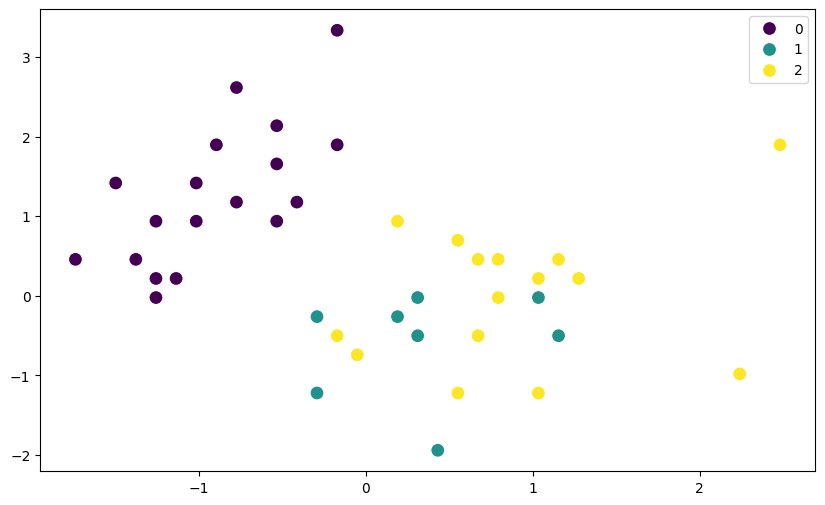

In [5]:
# Visalizando o modelo
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='viridis', s=100)

Resultados do modelo:


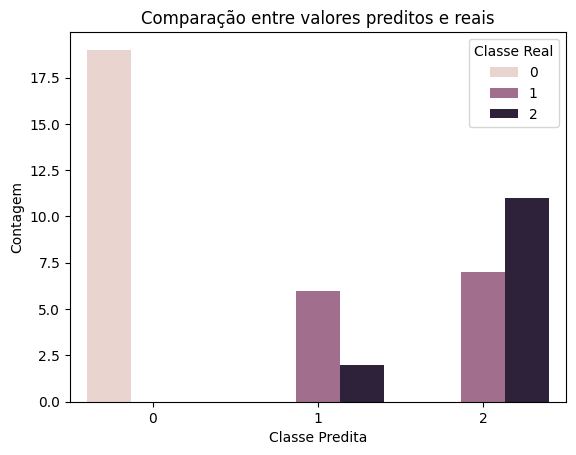

In [6]:
# Visualizando os resultados
print("Resultados do modelo:")
results_df = pd.DataFrame({
    'Predito': y_pred,
    'Real': y_test
})
sns.countplot(data=results_df, x='Predito', hue='Real')
plt.title('Comparação entre valores preditos e reais')
plt.xlabel('Classe Predita')
plt.ylabel('Contagem')
plt.legend(title='Classe Real', loc='upper right')
plt.show()

Agora conseguimos ver como o modelo classificou os dados com base nas duas variáveis usadas e pudemos ver como foi seu erro também, tudo faz sentido agora, não é?
Não!
O modelo funciona em certo grau, os gráficos ajudam um pouco, mas nada faz sentido se não conhecermos os dados! Sem isso, nem sabemos o que o modelo está fazendo, por quê teria esse resultado, o que está errando ou como melhorá-lo! E é sobre isso que falaremos no Laboratório de hoje!

# Exemplo 2: Entendendo a base de dados Iris
Antes de qualquer aplicação de Aprendizado de Máquina, ou mesmo de Aprendizado Profundo, é importante conhecermos os dados que estamos trabalhando. Só assim podemos entender as necessidades e características dos dados e escolher um modelo de AM apropriado!
Boa parte do processo de AM é o estudo e tratamento dos dados que vamos utilizar, mesmo as IAs mais avançadas vai aprender lixo se for ensinada com lixo, com o conceito conhecido como _Garbage In, Garbage Out_ (Lixo Entra, Lixo Sai).
E, para isso, vamos utilizar as bibliotecas apresentadas, com o dataset Iris de exemplo. Se já não tiver importado tudo no exemplo anterior, rode o código abaixo.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

Primeiro, vamos dar uma olhada nos dados do Iris. Podemos utilizar a função print() ou display() para isso, ou apenas escrever o nome da estrutura de dados na última linha de uma célula Python.

In [8]:
iris = load_iris()
display(iris.data, iris.feature_names, iris.target, iris.target_names)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Assim, conseguimos ver que os dados são numéricos e que estão dispostos em uma matriz. Também conseguimos informações sobre o que são cada um dos atributos e das classes (_targets_). Esse dataset possui três classes, _setosa_, _versicolor_ e _virginica_, que são espécies do gênero _Iris_. Já os atributos correspondem ao comprimento e largura da sépala e da pétala, em centímetros. Com isso, é mais fácil entender que essa base de dados é composta de exemplos de medidas de flores das três espécies mencionadas. Se treinarmos um modelo de AM que aprenda o padrão das flores de cada espécie, ele poderia advinhar a espécie de uma flor do gênero _Iris_ somente pelas suas medidas!

Agora, vamos organizar esses dados em um DataFrame do Pandas. DataFrame é um tipo de estrutura de dados próprio do Pandas, para matrizes de n dimensões, e que nos possibilita usar várias funcionalidades da biblioteca.
Aqui, vamos adicionar os dados, com os nomes de atributos fornecidos, e a espécie em uma nova coluna _species_. Para isso, vamos transformar os dados de _target_ em uma Series.

In [9]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target, index=iris_df.index)
display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


E temos um DataFrame Pandas, que já nos facilita a visualização! E ainda ganhamos uma informação nova, temos 150 linhas, que são a quantidade de exemplos da base, e 5 colunas, que já havíamos definido. Também podemos verificar esse valor com a função _shape_.
Mas, as classes ainda estão em formato numérico, seria melhor para entender se conseguissemos ler os nomes diretamente. Vamos fazer isso por meio de um dicionário Python, então podemos mapear os valores para ele.

In [10]:
display(iris_df.shape)

species_map = {i: species for i, species in enumerate(iris.target_names)}
iris_df['species'] = iris_df['species'].map(species_map)
display(iris_df)

(150, 5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Explorando os dados
Com nossos dados armazenados em um DataFrame, fica bem mais prático observar como ele funciona.
Por exemplo, podemos selecionar apenas as n primeiras linhas, ou as últimas.

In [11]:
display(iris_df.head(5))  # Exibe as 5 primeiras linhas do DataFrame
display(iris_df.tail(5))  # Exibe as 5 últimas linhas do DataFrame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Podemos selecionar um grupo de linhas ou colunas...

In [12]:
display(iris_df[5:10])  # Exibe as linhas de índice 5 a 9
display(iris_df[['sepal length (cm)', 'species']])  # Exibe apenas as colunas de comprimento da sépala e espécie

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


,sepal length (cm),species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
...,...,...
145,6.7,virginica
146,6.3,virginica
147,6.5,virginica
148,6.2,virginica


E também podemos pedir algumas informações mais detalhadas.

In [13]:
display(iris_df.describe())  # Exibe estatísticas descritivas do DataFrame
display(iris_df.info()) # Exibe informações sobre o DataFrame, como tipos de dados e valores nulos

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

Outra funcionalidade interessante é agrupar os dados, por exemplo, pela classe, para conseguirmos estatísticas separadas para cada uma.

In [14]:
iris_grouped = iris_df.groupby('species')
display(iris_grouped.head(5))  # Exibe as 5 primeiras linhas de cada grupo
display(iris_grouped.size()) # Exibe o tamanho de cada grupo
display(iris_grouped.describe())  # Exibe estatísticas descritivas agrupadas por espécie

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


,0
species,
setosa,50
versicolor,50
virginica,50


sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
species                                                                
setosa                 50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

Podemos também separar novamente os dados em atributos (X) e classes (y), o que é interessante se não estivermos trabalhando com um dataset com esses parâmetros definidos ou quisermos resolver outro problema, por exemplo, estimar a largura da sépala através das demais medidas e da espécie.
Por enquanto, vamos separar da forma anterior, removendo a coluna de espécies para armazenar em X e criando uma Series y com ela.
Note que chamar as funções sob o DataFrame não o altera, isso acontece apenas se atribuirmos a alteração a ele ou utilizarmos o parâmetro inplace=True.

In [15]:
X = iris_df.drop(columns=['species'])
y = iris_df['species']
display(X.head())
display(y.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


Com valores apenas numéricos, podemos conseguir outras informações de X, como a matriz de correlação.

In [16]:
X.corr()  # Exibe a matriz de correlação entre as colunas numéricas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## Visualizando os dados
Com o uso da biblioteca Pandas, já conseguimos entender, manipular e explorar os dados, mas ainda não é tão simples visualizá-los. Para isso, vamos utilizar as bibliotecas matplotlib e seaborn!
No Laboratório de hoje, vamos explorar quatro tipos de gráficos: Boxplots, Histogramas, Scatterplots (gráfico de pontos) e Heatmaps (mapas de calor).

### Boxplots
Boxplot é um tipo de gráfico que "desenha", ou como costuma-se falar, em bom inglês abrasileirado, **plota**, caixas representando os dados. Um boxplot é como uma representação visual da tabela _describe_. A linha ao centro da caixa representa a mediana, os limites inferiores e superiores das caixas representam os 1º e 3º quartis, respectivamente, a linha de cima, o valor máximo, e a de baixo, o mínimo. Pontos fora dessas linhas são chamados de outliers, valores que estão muito distantes dos demais pela distribuição.

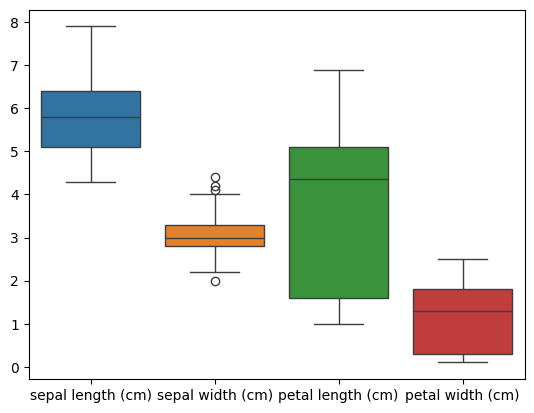

In [27]:
sns.boxplot(data=iris_df, orient='v')
plt.show()

Podemos também dividir as caixas para ver como cada atributo se comporta em cada classe, plotando um gráfico para cada um.

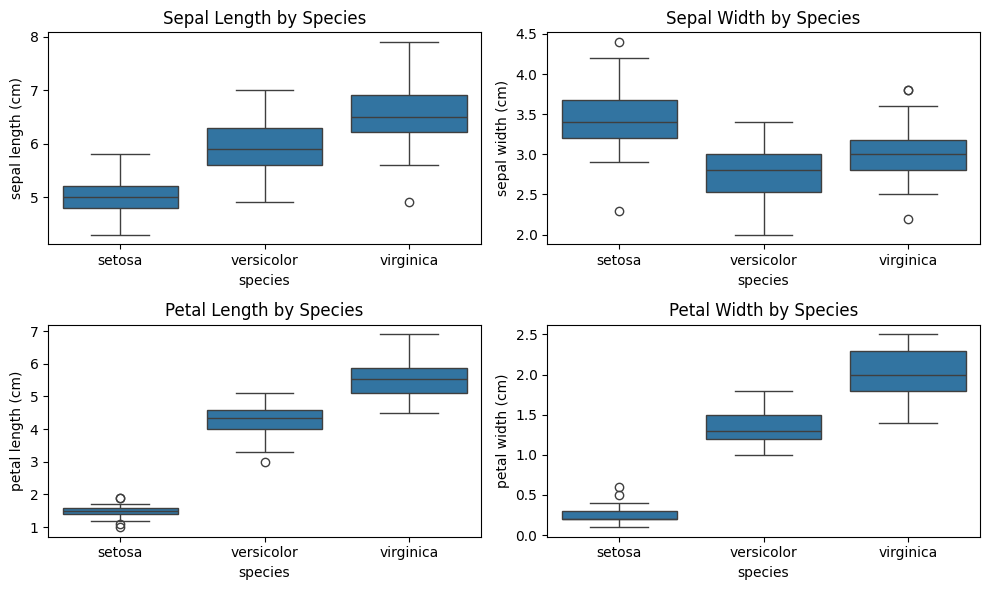

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.boxplot(x='species', y='sepal length (cm)', data=iris_df, ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length by Species')

sns.boxplot(x='species', y='sepal width (cm)', data=iris_df, ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width by Species')

sns.boxplot(x='species', y='petal length (cm)', data=iris_df, ax=axes[1, 0])
axes[1, 0].set_title('Petal Length by Species')

sns.boxplot(x='species', y='petal width (cm)', data=iris_df, ax=axes[1, 1])
axes[1, 1].set_title('Petal Width by Species')

plt.tight_layout()
plt.show()

### Histogramas
Histogramas são gráficos que dividem os valores em intervalos ou "cestas", em que cada barra representa uma dessas cestas e a altura, a quantidade de elementos nessa mesma cesta, sendo uma boa forma de observar a distribuição dos dados.

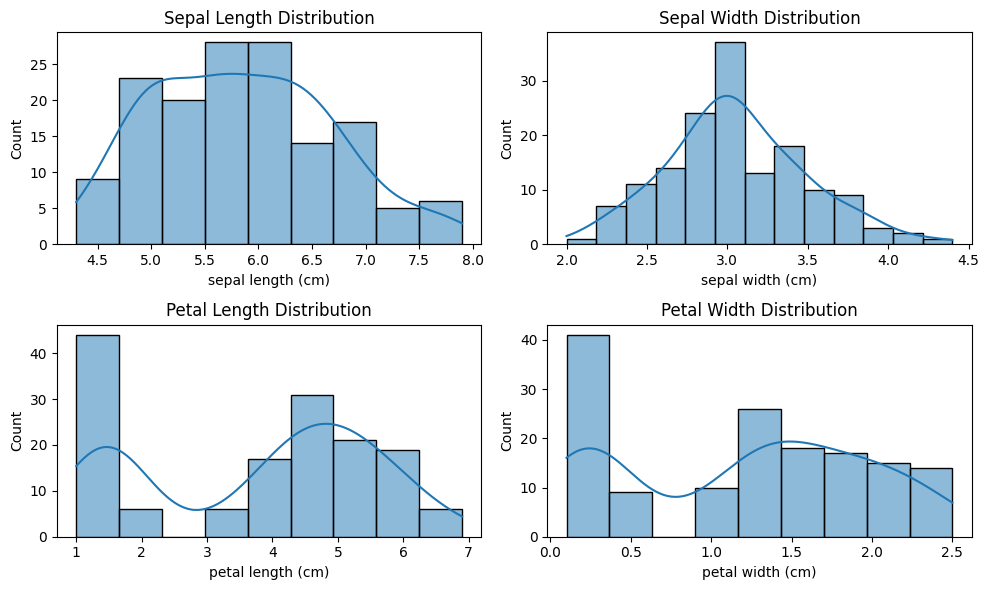

In [32]:
# Histograms per column in iris_df with seaborn
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.histplot(data=iris_df, x='sepal length (cm)', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length Distribution')

sns.histplot(data=iris_df, x='sepal width (cm)', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width Distribution')

sns.histplot(data=iris_df, x='petal length (cm)', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Petal Length Distribution')

sns.histplot(data=iris_df, x='petal width (cm)', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Petal Width Distribution')

plt.tight_layout()
plt.show()

### Scatterplots
Scatterplots são gráficos de pontos e servem para vermos a distribuição entre os valores de acordo com dois atributos, ou três em gráficos 3D.
Por exemplo, podemos selecionar os dois primeiros atributos "plotar" um gráfico bidimensional para vermos sua distribuição.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

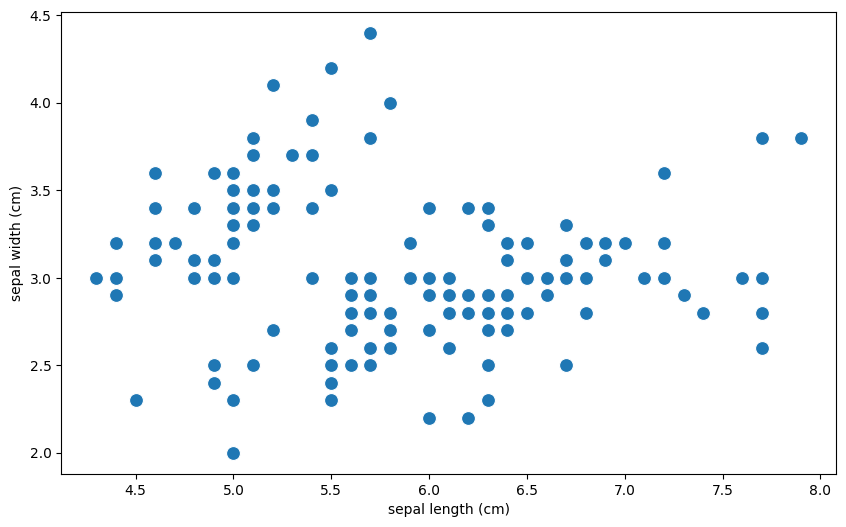

In [18]:
# Visualizando sepal length vs sepal width
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris_df, s=100) # Plota o gráfico de dispersão

Podemos também adicionar mais informações para esse gráfico, como a identificação das classes, título, legenda, definir tamanho e escala, entre outros.

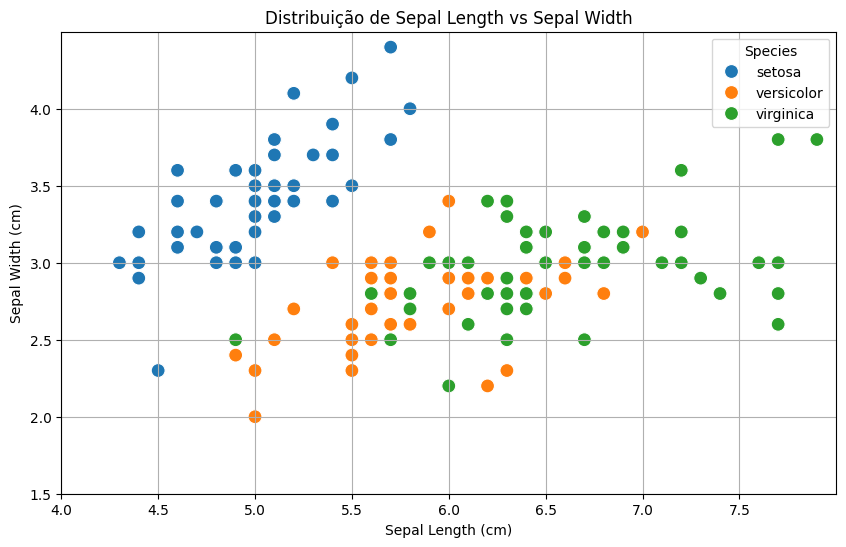

In [19]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=iris_df, s=100)  # Plota o gráfico de dispersão com cores por espécie
plt.title('Distribuição de Sepal Length vs Sepal Width')  # Título do gráfico
plt.xlabel('Sepal Length (cm)') # Rótulo do eixo X
plt.ylabel('Sepal Width (cm)')  # Rótulo do eixo Y
plt.xlim(4, 8)  # Define os limites do eixo X
plt.ylim(1.5, 4.5)  # Define os limites do eixo Y
plt.xticks(np.arange(4, 8, 0.5))  # Define os ticks do eixo X
plt.yticks(np.arange(1.5, 4.5, 0.5))  # Define os ticks do eixo Y
plt.legend(title='Species')  # Legenda do gráfico
plt.grid(True) # Adiciona grade ao gráfico
plt.show()  # Exibe o gráfico

O seaborn inclusive possui uma função que realiza gráficos de distribuição para toda a base.

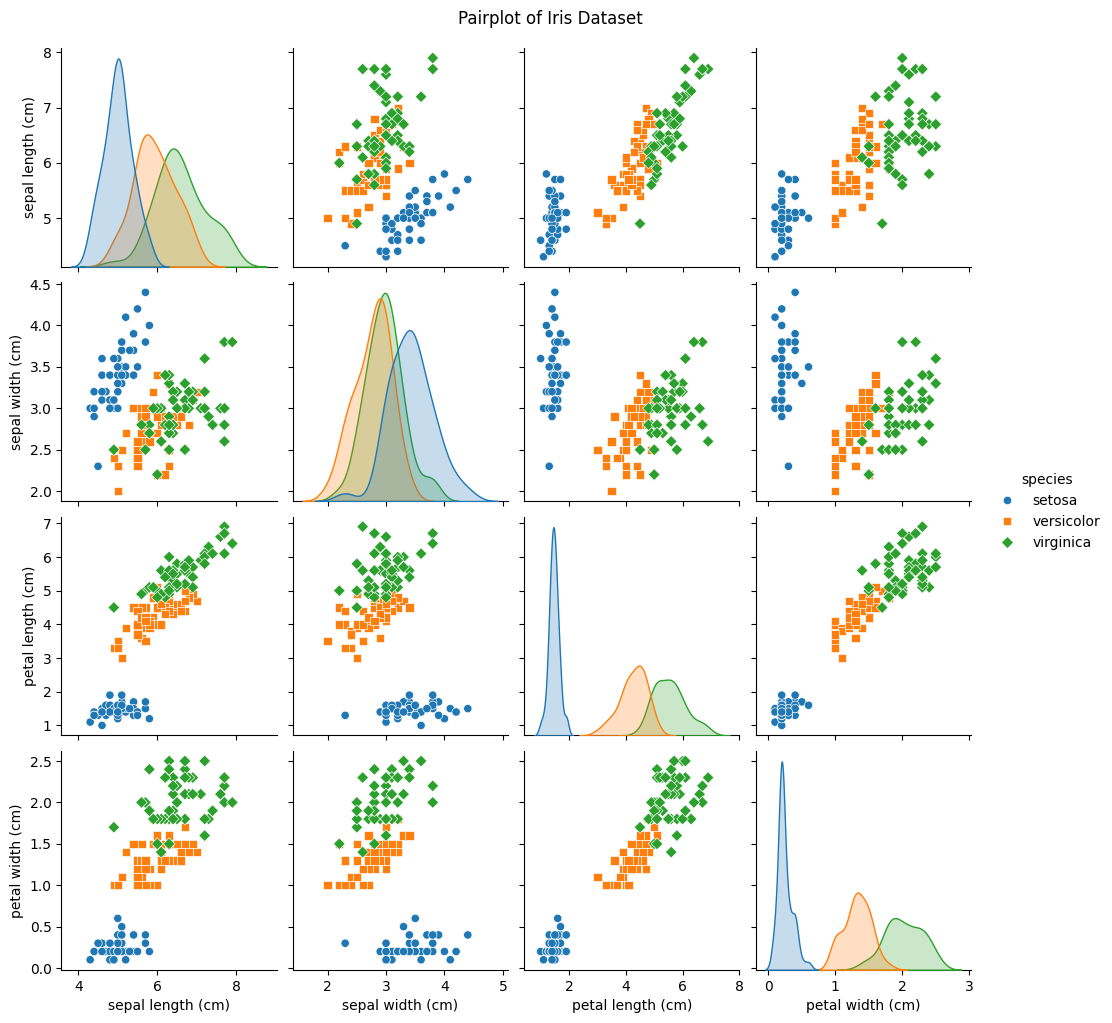

In [20]:
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], height=2.5)  # Plota gráficos de dispersão para todas as combinações de atributos
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()  # Exibe o gráfico

### Heatmaps
Heatmaps são mapas de calor, que demonstram os valores em uma escala de cores. Podem ser cores mais intensas para valores mais relevantes, ou uma escala referente ao positivo e negativo. O estilo 'coolwarm' define como vermelho (quente) os valores positivos mais altos, e como azul (frio), os negativos mais baixos.
Como exemplo, podemos demonstras a matriz de correlação desse modo.

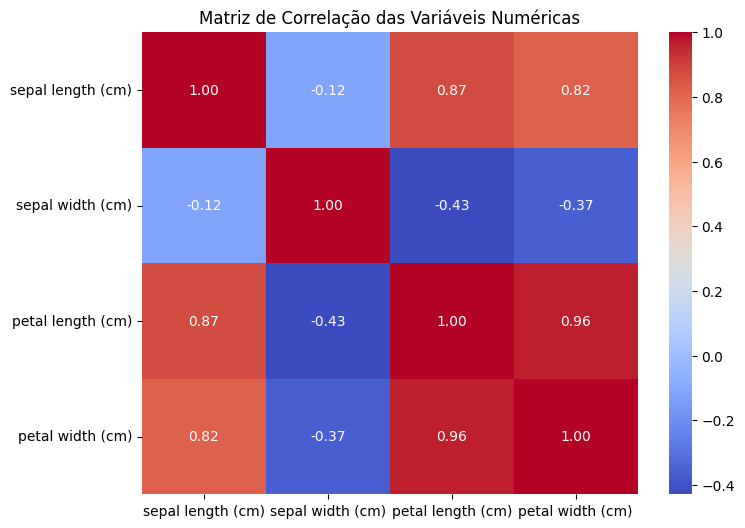

In [21]:
# Exibe a matriz de correlação entre as colunas numéricas com um mapa de calor
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

# Exemplo 1.1: Retornando após entender os dados!
Agora que entendemos melhor os dados, podemos aplicar nosso conhecimento no exemplo anterior!
Na nossa primeira tentativa (e agora que sabemos o que significa cada coluna), tentamos ensinar o modelo a identificar as espécies através do comprimento e largura da sépala. Se voltar para os scatterplots do Exemplo 2, poderá ver que alguns pontos se misturam entre as classes versicolor e virginica, exatamente o que contatamos ser a confusão do modelo. Nesses mesmos gráficos, podemos ver que a divisão entre os dados utilizando o comprimento e largura da pétala é um pouco mais evidente, então por que não tentamos ensinar isso ao modelo dessa vez?
Novamente, não se preocupe com os detalhes desse exemplo, o foco de hoje são os dados!

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data[:, 2:] # Aqui mudamos! Antes estavamos usando as duas primeiras colunas (:2), agora estamos usando as duas últimas!
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Acurácia: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



BINGO! Dessa vez o modelo conseguiu uma acurácia de 1.00, ou seja, 100% de acerto! É possível que ele ainda erre a depender dos dados que testarmos, mas já foi um resultado melhorado em comparação ao anteiror. Esse é apenas um dos exemplos da importância de entender os dados em Aprendizado de Máquina!
Podemos usar os gráficos para ver a diferença também, mas exploraremos isso melhor em um outro laboratório.

<Axes: >

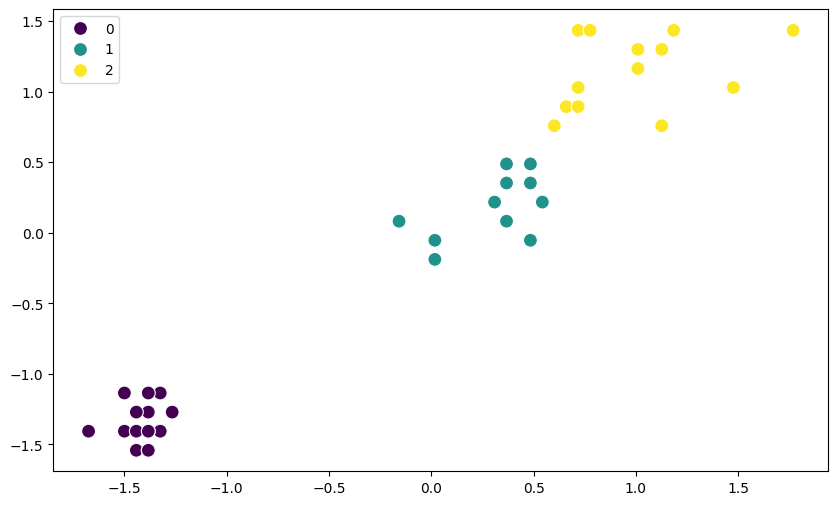

In [34]:
# Visalizando o modelo
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='viridis', s=100)

Resultados do modelo:


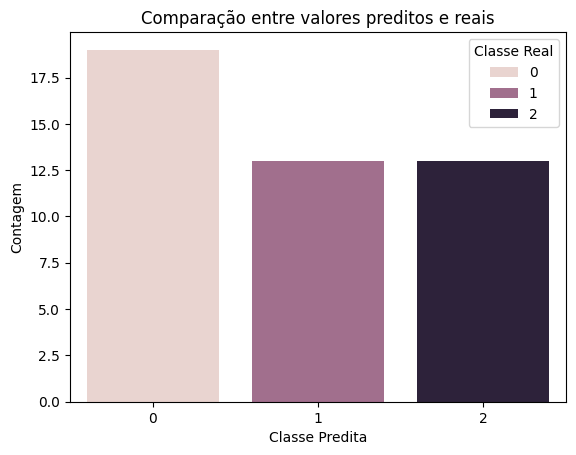

In [35]:
# Visualizando os resultados
print("Resultados do modelo:")
results_df = pd.DataFrame({
    'Predito': y_pred,
    'Real': y_test
})
sns.countplot(data=results_df, x='Predito', hue='Real')
plt.title('Comparação entre valores preditos e reais')
plt.xlabel('Classe Predita')
plt.ylabel('Contagem')
plt.legend(title='Classe Real', loc='upper right')
plt.show()

# Exercício!
SUA VEZ!

Agora chegou a hora de colocar os conhecimentos em prática!

Escolha uma das outras bases de dados já disponíveis pelo scikit-learn:
- Diabetes
- Linnerud
- Wine
- Breast Cancer

E aplique as técnicas mostradas no Exemplo 2. Salve a base de dados em um DataFrame, explore os dados com o Pandas e plote ao menos um gráfico de cada tipo mostrado. Não se preocupe, não vai precisar aplicar esses dados em nenhum modelo de Aprendizado de Máquina... ainda.

In [ ]:
# Seu código aqui

# Desafio! (Opcional)
Se já está satisfeito em utilizar os dados disponibilizados pelo scikit, tente fazer esses experimentos com um conjunto de dados diferente!

Você pode subir uma planilha no ambiente virtual ou pelo Google Drive e salvar direto em um DataFrame Pandas, com pd.read_csv() ou pd.read_excel(). Ou pode se aventurar em utilizar alguma base gratuita de dados, essa postagem do LinkedIn traz alguns links de APIs disponíveis: https://www.linkedin.com/feed/update/urn:li:activity:7333187547835039746/